In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df = pd.read_csv('Dataset/Student_Performance (1).csv')

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [15]:
df.sample(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6938,5,59,No,7,3,45.0
7163,6,88,Yes,6,7,78.0
963,7,85,Yes,5,3,73.0


In [23]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [16]:
df.count()

Hours Studied                       10000
Previous Scores                     10000
Extracurricular Activities          10000
Sleep Hours                         10000
Sample Question Papers Practiced    10000
Performance Index                   10000
dtype: int64

In [19]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

### There is Extracurricular Activities feature that has object datatype
#### Let's replace Yes with 1 and No with 0

In [24]:
df["Extracurricular Activities"]=df["Extracurricular Activities"].replace(to_replace=['No', 'Yes'], value=[0, 1])

In [26]:
df.head(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0


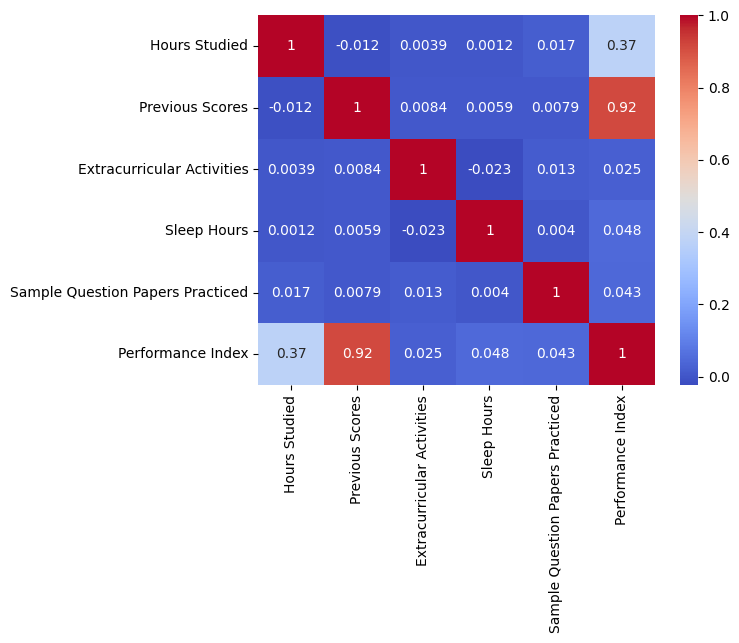

In [34]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True) #cmap='plasma'
plt.show()

In [35]:
df.corr()['Performance Index'].sort_values()

Extracurricular Activities          0.024525
Sample Question Papers Practiced    0.043268
Sleep Hours                         0.048106
Hours Studied                       0.373730
Previous Scores                     0.915189
Performance Index                   1.000000
Name: Performance Index, dtype: float64

In [39]:
#Setting the value for X and Y
x = df.drop(['Performance Index'], axis = 1)
y = df['Performance Index']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [41]:
model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression()

In [43]:
#Prediction of test set
y_pred = model.predict(x_test)

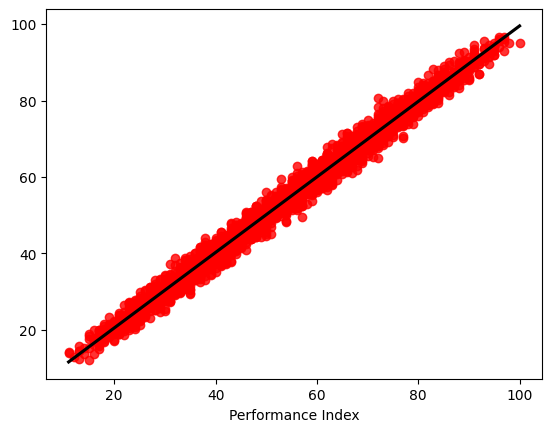

In [51]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red',line_kws={"color": "black"});

In [54]:
#Actual value and the predicted value
pred_df=pd.DataFrame({
    'Actual Value':y_test,
    'Predicted Value':y_pred,
    'Difference':y_test-y_pred
})
pred_df.sample(5)

,Actual Value,Predicted Value,Difference
1317,71.0,72.278934,-1.278934
8815,73.0,71.715986,1.284014
7834,61.0,57.916056,3.083944
901,32.0,35.443803,-3.443803
674,72.0,70.487706,1.512294


In [65]:
#Model Evaluation
rSquared = model.score(x, y)*100
meanSqErr = metrics.mean_squared_error(y_test, y_pred)

print('R Squared: {:.3f}'.format(rSquared))
print('Mean Square Error:', meanSqErr)

R Squared: 98.875
Mean Square Error: 4.212998016862824


In [86]:
# Predicting Test Set

#HoursStudied PreviousScores ExtracurricularActivities SleepHours SampleQuestionPapersPracticed
data = [8, 84, 1, 7, 1]

performance_index = model.predict([data])
            
print('{:.2f}'.format(performance_index[0]))

78.48


C:\Users\nigap\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [90]:
import pickle

In [91]:
pickle.dump(model, open('model.pkl', 'wb'))